

---
**LAB6**


---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('Lab6_data.xlsx')
df.head(10)



,DEPT [MD],VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5
0,1050.0,3055,1531,1573,49766683317413,1.490218e-07,88,8.917627e+12,1.629024e+10
1,1050.1,3034,1517,1552,51917976630989,1.447758e-07,98,-4.181219e+13,1.711206e+10
2,1050.2,3025,1510,1539,52937501416995,1.421186e-07,101,-2.550837e+13,1.750000e+10
3,1050.3,3016,1504,1526,53973542181495,1.395260e-07,105,-5.251573e+13,1.789574e+10
4,1050.4,3030,1498,1523,54823457877834,1.388839e-07,106,-6.034015e+14,1.809355e+10
5,1050.5,3058,1493,1522,55684315391959,1.386300e-07,96,-1.640276e+14,1.820939e+10
6,1050.6,3085,1493,1521,55684315391959,1.383765e-07,106,-4.052963e+13,1.805002e+10
7,1050.7,3113,1493,1526,55684315391959,1.394453e-07,106,4.263216e+13,1.788767e+10
8,1050.8,3133,1506,1534,53589918434209,1.409694e-07,90,-7.115511e+13,1.710499e+10
9,1050.9,3147,1524,1551,50782540549249,1.444163e-07,86,-7.323396e+13,1.613681e+10


In [ ]:
df.describe()

,DEPT [MD],VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5
count,5501.000000,5501.000000,5501.000000,5501.000000,5.501000e+03,5.501000e+03,5501.000000,5.501000e+03,5.501000e+03
mean,1325.000000,3438.722232,1778.546264,1806.961825,2.820698e+13,2.047514e-07,91.562261,-7.747425e+12,8.441844e+09
std,158.814625,218.656326,169.944724,172.490712,1.184023e+13,4.322203e-08,8.429687,4.695632e+14,4.025102e+09
min,1050.000000,2922.000000,1411.000000,1429.000000,7.239360e+12,1.208362e-07,71.000000,-1.119341e+16,1.755848e+09
25%,1187.500000,3253.000000,1627.000000,1660.000000,1.818570e+13,1.678445e-07,85.000000,-2.647683e+13,5.083176e+09
50%,1325.000000,3439.000000,1768.000000,1807.000000,2.602817e+13,2.021725e-07,92.000000,-8.689318e+11,7.557726e+09
75%,1462.500000,3600.000000,1911.000000,1929.000000,3.794837e+13,2.335539e-07,98.000000,2.496423e+13,1.167083e+10
max,1600.000000,4123.000000,2319.000000,2389.000000,7.163776e+13,3.742931e-07,114.000000,9.500925e+15,2.373683e+10


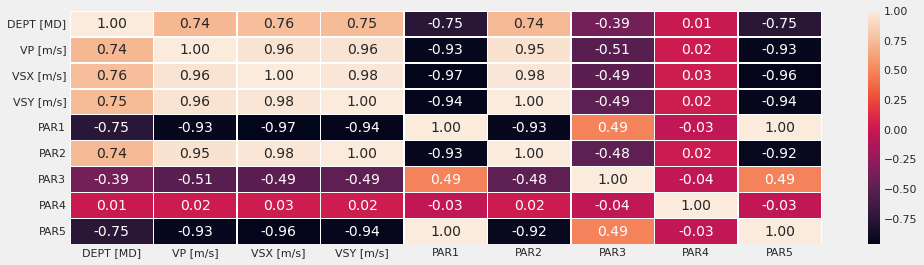

In [ ]:
corr = df.corr()
f,ax = plt.subplots(figsize=(15,4))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.2f',ax=ax);

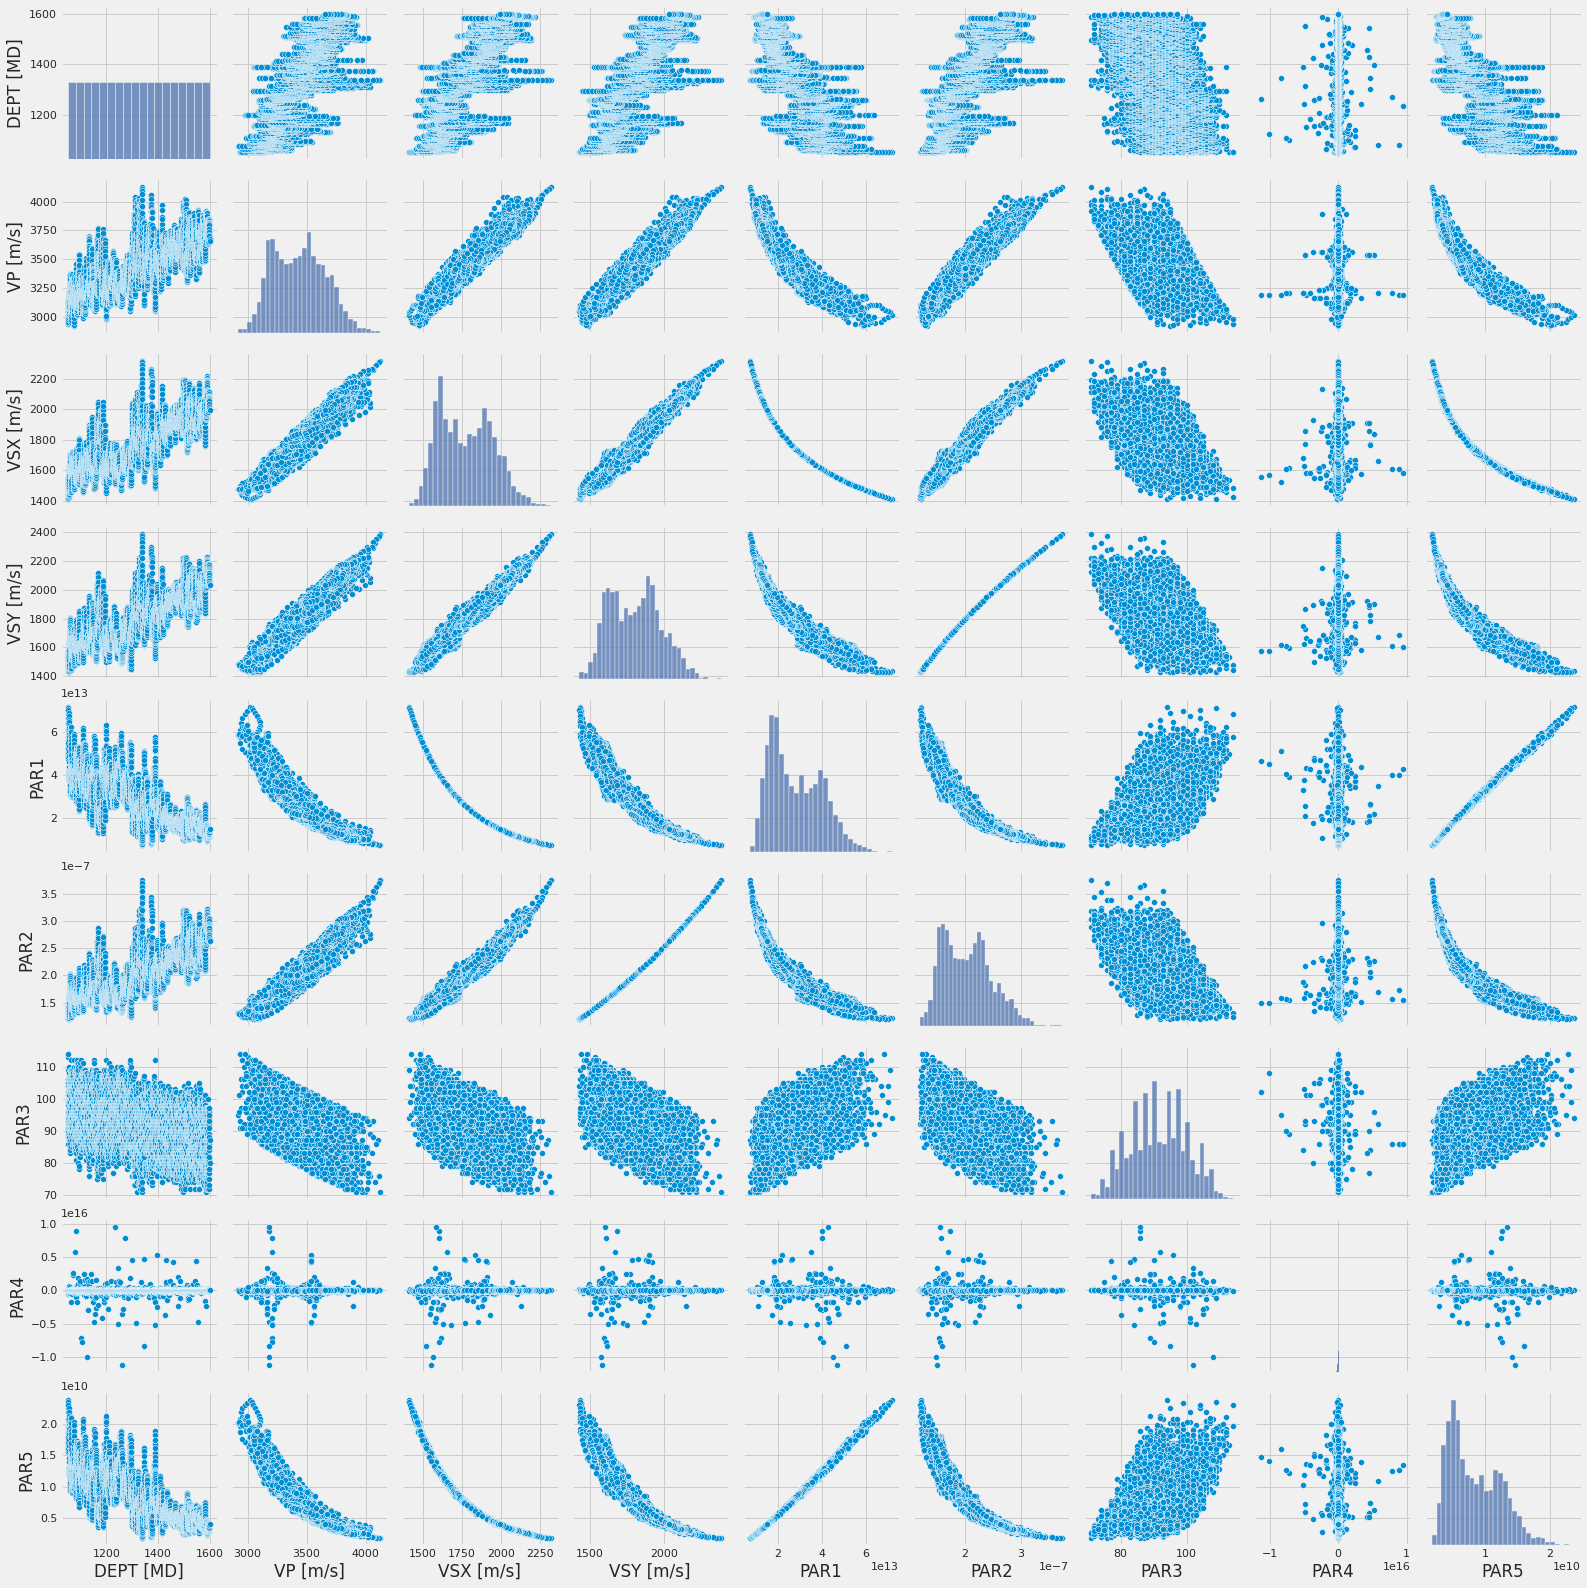

In [ ]:
sns.pairplot(df)

**Normalizacja danych:**

In [ ]:
dept=df['DEPT [MD]']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.drop('DEPT [MD]',axis=1))
scaled_features = scaler.transform(df.drop('DEPT [MD]',axis=1))
df = pd.DataFrame(scaled_features,columns=df.columns.drop('DEPT [MD]'))
df['DEPT [MD]']=dept

df.head(5)

,VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5,DEPT [MD]
0,0.110741,0.132159,0.150000,0.660379,0.111205,0.395349,0.541323,0.661226,1050.0
1,0.093256,0.116740,0.128125,0.693785,0.094452,0.627907,0.538872,0.698613,1050.1
2,0.085762,0.109031,0.114583,0.709616,0.083968,0.697674,0.539660,0.716262,1050.2
3,0.078268,0.102423,0.101042,0.725704,0.073740,0.790698,0.538355,0.734266,1050.3
4,0.089925,0.095815,0.097917,0.738902,0.071206,0.813953,0.511735,0.743265,1050.4




---
***REGRESJA LINIOWA***


---





**Selekcja danych:**

do modelu wybrałam zmienną 'PAR2', ponieważ jest ona  najsilniej skorelowana ze zmienną objaśnianą-'VP' i występuje pomiędzy nimi relacja liniowa

In [ ]:
X=df['PAR2']
Y=df['VP [m/s]']

**Podział danych:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=42)

**Model prostej regresji liniowej dla prędkości fali podłużnej (VP):**

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()


LR.fit(X_train.values.reshape(-1,1),y_train)
pred=LR.predict(X_test.values.reshape(-1,1))

**Wizualizacja modelu i ocena:**

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2 score:', metrics.r2_score(y_test, pred))

print(f"Test score: {LR.score(X_test.values.reshape(-1,1), y_test)*100:.2f}%")


MAE: 0.0435147991362366
MSE: 0.003024927794371778
RMSE: 0.05499934358128084
R2 score: 0.9096410879621826
Test score: 90.96%


MAE,MSE,RMSE są bliskie 0, a R^2 jest bliski 1, Test score 90,96% :więc model jest bardzo dobry

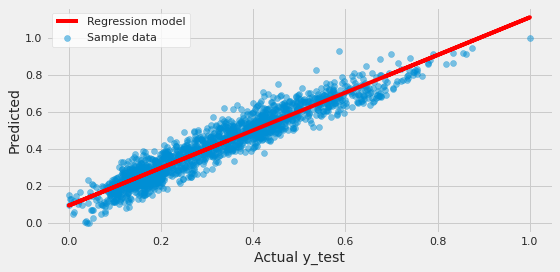

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_test.values.reshape(-1,1), pred, color='red', label='Regression model')
ax.scatter(X_test.values.reshape(-1,1), y_test, alpha=0.5,label='Sample data')
ax.set_ylabel('Predicted', fontsize=14)
ax.set_xlabel('Actual y_test', fontsize=14)
ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()

**Wizualizacja głębokości od przewidywanej prędkości - ocena jakości predykcji na danej głębokości:**

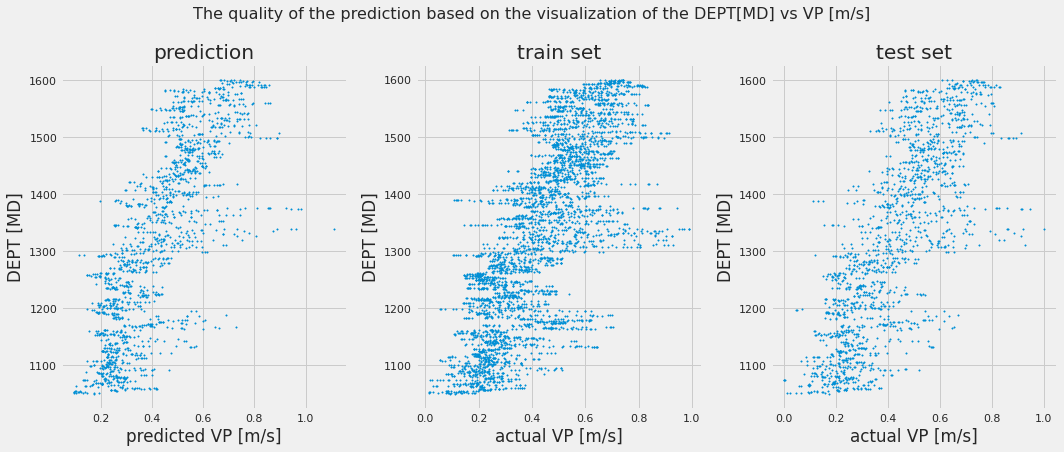

In [ ]:
plt.figure(figsize=(15,6))
plt.suptitle('The quality of the prediction based on the visualization of the DEPT[MD] vs VP [m/s]', fontsize=16,y=1.05)
plt.subplot(1, 3, 1)
plt.scatter(pred, df['DEPT [MD]'].iloc[X_test.index].values,s=2 )
plt.title('prediction')
plt.xlabel('predicted VP [m/s]')
plt.ylabel('DEPT [MD]')
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.title('train set')
plt.scatter(y_train, df['DEPT [MD]'].iloc[X_train.index].values,s=2)
plt.xlabel('actual VP [m/s]')
plt.ylabel('DEPT [MD]')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.title('test set')
plt.scatter(y_test, df['DEPT [MD]'].iloc[X_test.index].values,s=2)
plt.xlabel('actual VP [m/s]')
plt.ylabel('DEPT [MD]')
plt.tight_layout()

Jakość predykcji jest wysoka, wykresy różnią się minimalnie, na pierwszy rzut oka ciężko dostrzec wyraźne różnice

**Badanie założeń do regresji liniowej:**

***1.czy spełnione jest założenie, że istniej liniowa zależność między predyktorami (np.zmiennymi niezależnymi lub cechami) a zmienną objaśnianą(np.zmienną zależną lub etykietą)***

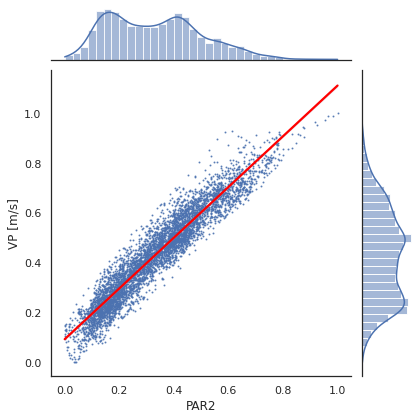

In [ ]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(x='PAR2',y='VP [m/s]',data=df, kind='reg',scatter_kws={'s': 1})
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

**2.rozkład błędów jest normalny**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of residuals')

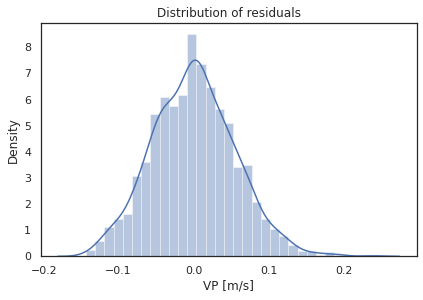

In [ ]:
residuals = y_test-pred

sns.distplot(residuals,kde=True)
plt.title('Distribution of residuals')

***3.homoskedastyczności- rezydua muszą być równo rozproszone***

In [ ]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': pred.reshape(-1)})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])  

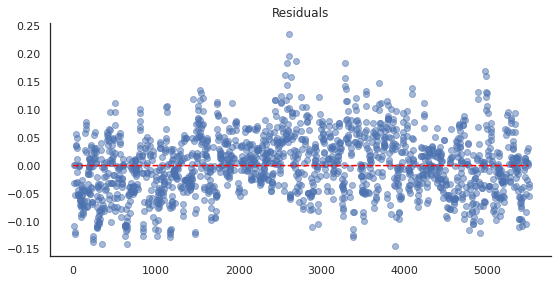

In [ ]:
plt.subplots(figsize=(8, 4))
ax = plt.subplot(111)  
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='red', linestyle='--')
ax.spines['right'].set_visible(False)  
ax.spines['top'].set_visible(False)  
plt.title('Residuals')
plt.show()  

Z powyższych wykresów widać, że istnieje liniowa zależność, rozkład błędów jest normalny i rezydua są równo rozproszone, więc wszystkie 3 założenia regresji liniowej zostały spełnione



---
**REGRESJA WIELORAKA**


---





**Wybór parametrów do regresji wielorakiej:**

Zmienne które są silnie skorelowane z 'VP [m/s]' to 'PAR1','PAR2', 'PAR5', 'PAR3', ale nie mogą one wszystkie zostać wykorzystane do modelu ponieważ zmienne powinne być skorelowane z celem, a nie powinny być skorelowane ze sobą. Dlatego do modelu wybrałam tylko 'PAR2' i 'PAR3'

In [ ]:
X2=df[['PAR2','PAR3']]
Y2=df['VP [m/s]']

**Podział danych:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,Y2, test_size=0.30, random_state=42)

**Model regresji wielorakiej dla prędkości fali podłużnej (VP):**

In [ ]:
LR2=LinearRegression()

model=LR2.fit(X_train2,y_train2)
predicted=model.predict(X_test2)

**Ocena i wizualizacja modelu:**

In [ ]:
import sklearn.metrics as metrics
print('MAE:', metrics.mean_absolute_error(y_test2, predicted))
print('MSE:', metrics.mean_squared_error(y_test2, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predicted)))
print('R2 score:', metrics.r2_score(y_test2, predicted))

print(f"Test score: {LR2.score(X_test2, y_test2)*100:.2f}%")

MAE: 0.0429367759446463
MSE: 0.002928764347304441
RMSE: 0.05411805934532798
R2 score: 0.9125136274227865
Test score: 91.25%


MAE,MSE,RMSE są bliskie 0, a R^2 wynosi 0.87 , Test score: 91.25% więc model jest bardzo dobry

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


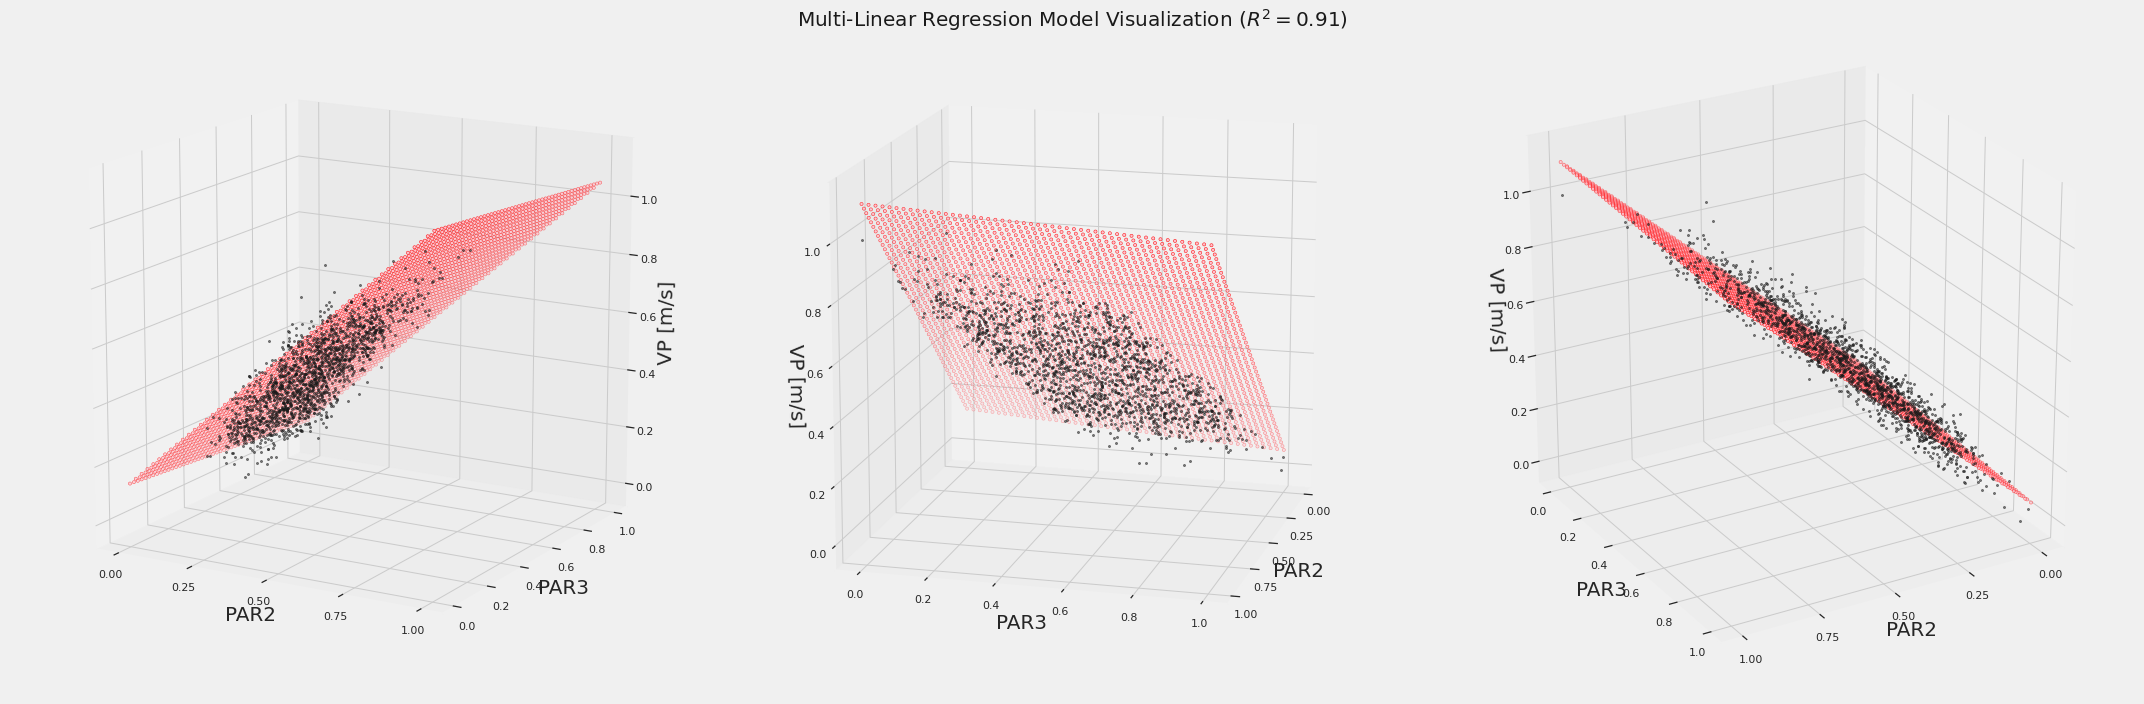

In [ ]:
# Prepare data
X = X_test2.values.reshape(-1,2)
Y = y_test2

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(0, 1, 50)  # range of price values
yy_pred = np.linspace(0, 1, 50)  # range of advertising values

xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T


pred = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(30, 10))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5, markersize=2)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), pred,facecolor='pink', s=10, edgecolor='red')
    ax.set_xlabel('PAR2', fontsize=20)
    ax.set_ylabel('PAR3', fontsize=20)
    ax.set_zlabel('VP [m/s]', fontsize=20)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=15, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=20, color='k')

fig.tight_layout()

**Wizualizacja głębokości od przewidywanej prędkości - ocena jakości predykcji na danej głębokości:**

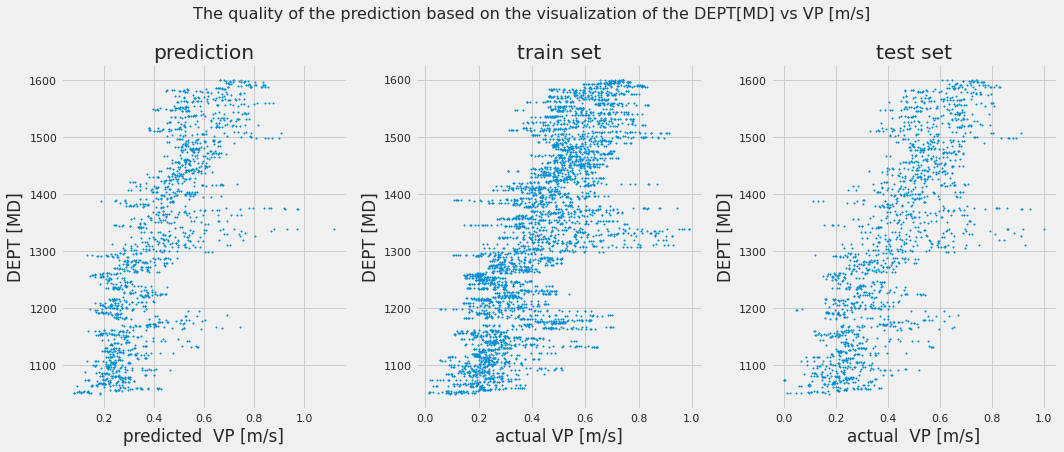

In [ ]:
plt.figure(figsize=(15,6))
plt.suptitle('The quality of the prediction based on the visualization of the DEPT[MD] vs VP [m/s]', fontsize=16,y=1.05)

plt.subplot(1, 3, 1)
plt.title('prediction')
plt.scatter(predicted, df['DEPT [MD]'].iloc[X_test2.index].values,s=2 )
plt.xlabel('predicted  VP [m/s]')
plt.ylabel('DEPT [MD]')

plt.subplot(1, 3, 2)
plt.title('train set')
plt.scatter(y_train2, df['DEPT [MD]'].iloc[X_train2.index].values,s=2)
plt.xlabel('actual VP [m/s]')
plt.ylabel('DEPT [MD]')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.title('test set')
plt.scatter(y_test2, df['DEPT [MD]'].iloc[X_test2.index].values,s=2)
plt.xlabel('actual  VP [m/s]')
plt.ylabel('DEPT [MD]')
plt.tight_layout()

Model regresji wielorakiej poradził sobie gorzej, tutaj widać od razu  różnicę pomiędzy rozmieszczeniem punktów na głębokości 1400-1500, chociaż mimo to uważam że jakość predykcji jest wysoka, ponieważ rezultat predykcji nie odbiega znacząco od rzeczywistych wartości.



---
**PODSUMOWANIE**


---




Oba modele wypadły bardzo dobrze. W obu przypadkach wartości MAE,MSE,RMSE były bliskie 0. Współczynnik r2 był wyższy w przypadku regresji limiowej -0.9, regresja wieloraka-0.87.W obu przypadkach jakość modelu i predykcji była wysoka- minimalnie lepiej pod względem jakości modelu wypadła regresja wieloraka 91,25%, liniowa-90,96%.

Według mnie nie ma dobrej odpowiedzi na pytanie który model należy wybrać jako model produkcyjny(finalny), ponieważ oba modele wypadły bardzo dobrze. Jednak gdybym miała wybrać tylko jeden z nich wybrałabym regresję liniową- miała ona wyższą wartość r2, jakość modelu była bardzo wysoka. Dodatkowo regresja liniowa jest prostszym modelem,co nie znaczy że gorszym - dodanie 'PAR3' do modelu regresji wielorakiej nie poprawiło znacząco wyników tylko bardziej skomplikowało model.